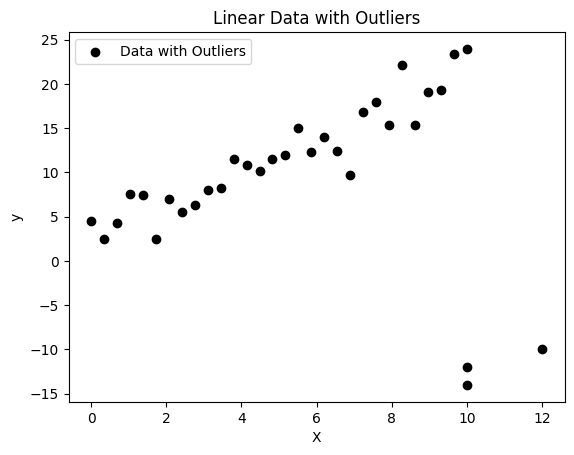

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Create sample data
np.random.seed(0)
X = np.linspace(0, 10, 30)
y = 2 * X + 1 + np.random.normal(0, 2, size=X.shape)  # Linear trend + noise

# Add outliers
X_outliers = np.append(X, [10,12,10])
y_outliers = np.append(y, [-12, -10,-14])  # These will distort the fit

# Reshape for sklearn
X_outliers = X_outliers.reshape(-1, 1)
y_outliers = y_outliers.reshape(-1, 1)

# Plot the data
plt.scatter(X_outliers, y_outliers, color='black', label='Data with Outliers')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Data with Outliers')
plt.legend()
plt.show()


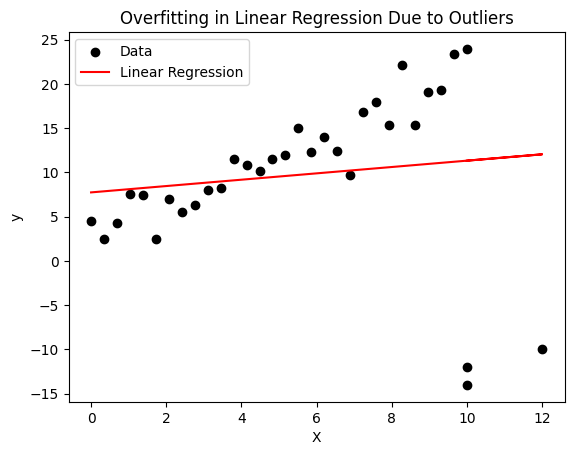

In [30]:
model_lin = LinearRegression()
model_lin.fit(X_outliers, y_outliers)
y_pred_lin = model_lin.predict(X_outliers)

plt.scatter(X_outliers, y_outliers, color='black', label='Data')
plt.plot(X_outliers, y_pred_lin, color='red', label='Linear Regression')
plt.title("Overfitting in Linear Regression Due to Outliers")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


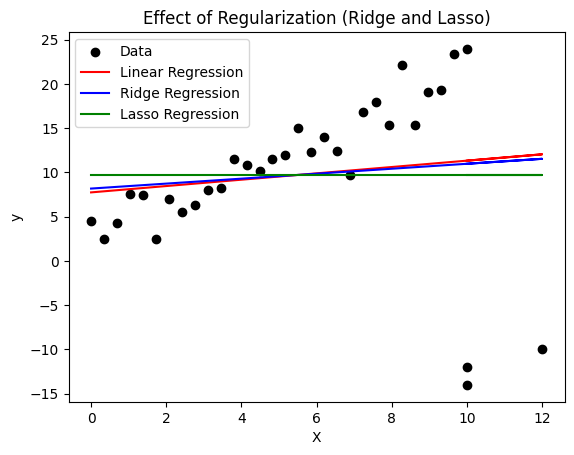

In [33]:
# Ridge Regression
model_ridge = Ridge(alpha=100.0)
model_ridge.fit(X_outliers, y_outliers)
y_pred_ridge = model_ridge.predict(X_outliers)

# Lasso Regression
model_lasso = Lasso(alpha=10.0)
model_lasso.fit(X_outliers, y_outliers.ravel())  # Flatten for Lasso
y_pred_lasso = model_lasso.predict(X_outliers)

# Plot all models
plt.scatter(X_outliers, y_outliers, color='black', label='Data')
plt.plot(X_outliers, y_pred_lin, color='red', label='Linear Regression')
plt.plot(X_outliers, y_pred_ridge, color='blue', label='Ridge Regression')
plt.plot(X_outliers, y_pred_lasso, color='green', label='Lasso Regression')
plt.title("Effect of Regularization (Ridge and Lasso)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


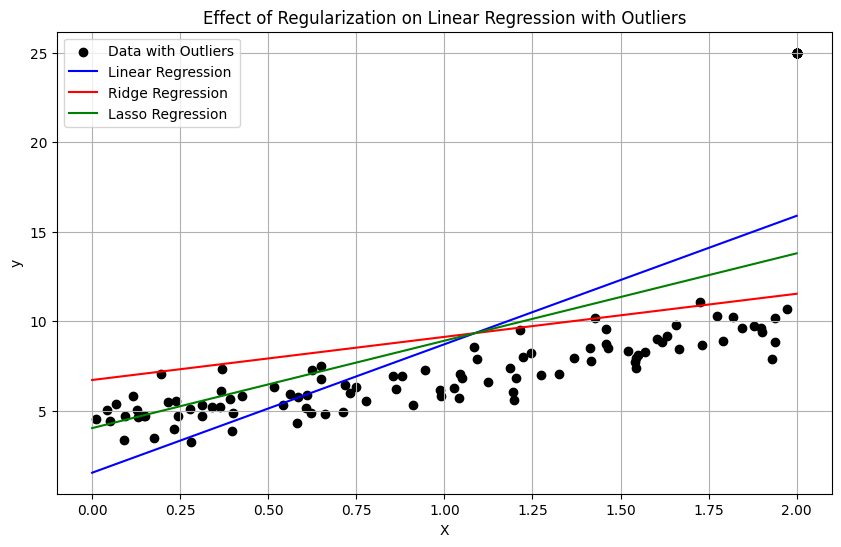

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Step 2: Add outliers
X_outliers = np.append(X, [[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],[2]], axis=0)
y_outliers = np.append(y, [[25],[25],[25],[25],[25],[25],[25],[25],[25],[25],[25],[25],[25],[25],[25],[25]], axis=0)

# Step 3: Fit models
# Linear Regression
lr = LinearRegression()
lr.fit(X_outliers, y_outliers)

# Ridge Regression
ridge = Ridge(alpha=100)
ridge.fit(X_outliers, y_outliers)

# Lasso Regression
lasso = Lasso(alpha=1)
lasso.fit(X_outliers, y_outliers)

# Step 4: Plotting
X_test = np.linspace(0, 2, 100).reshape(100, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X_outliers, y_outliers, color='black', label='Data with Outliers')

plt.plot(X_test, lr.predict(X_test), label='Linear Regression', color='blue')
plt.plot(X_test, ridge.predict(X_test), label='Ridge Regression', color='red')
plt.plot(X_test, lasso.predict(X_test), label='Lasso Regression', color='green')

plt.legend()
plt.title('Effect of Regularization on Linear Regression with Outliers')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [44]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dsworkshop74/ds-workshop/refs/heads/main/day-7/Titanic-Dataset.csv")

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [51]:
df1 = df[df['Survived'] == 0].sample(342)

In [52]:
df1.shape

(342, 12)

In [55]:
df2 = df[df['Survived'] == 1]

In [56]:
df2.shape

(342, 12)

In [57]:
df = pd.concat([df1,df2])

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S


In [59]:
df['Survived'].value_counts()

,count
Survived,
0,342
1,342


In [60]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dsworkshop74/ds-workshop/refs/heads/main/day-7/Titanic-Dataset.csv")

In [61]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [65]:
df1 = df[df['Survived'] == 1].sample(549,replace=True)
df1.shape

(549, 12)

In [66]:
df2 = df[df['Survived'] == 0]

In [67]:
df = pd.concat([df1,df2])

In [68]:
df['Survived'].value_counts()

,count
Survived,
1,549
0,549


In [69]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({np.int64(1): 900, np.int64(0): 100})
Resampled dataset shape Counter({np.int64(0): 900, np.int64(1): 900})
